In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.7 MB/s eta 0:00:0000:01


In [2]:
!cat /kaggle/input/fallenperson/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 4
names: ['fallen', 'lying', 'sitting', 'standing']

roboflow:
  workspace: rescue-robot-datasets
  project: fallen-person-uhif8-0zrzv
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/rescue-robot-datasets/fallen-person-uhif8-0zrzv/dataset/1

In [3]:
%%writefile /kaggle/working/data.yaml
train: /kaggle/input/fallenperson/train/images
val: /kaggle/input/fallenperson/valid/images
test: /kaggle/input/fallenperson/test/images

nc: 4
names: ['fallen', 'lying', 'sitting', 'standing']


Writing /kaggle/working/data.yaml


In [4]:
!cat /kaggle/working/data.yaml

train: /kaggle/input/fallenperson/train/images
val: /kaggle/input/fallenperson/valid/images
test: /kaggle/input/fallenperson/test/images

nc: 4
names: ['fallen', 'lying', 'sitting', 'standing']


In [5]:
from ultralytics import YOLO
import os

model = YOLO("yolov8s.pt")

model.train(
    data="/kaggle/working/data.yaml",
    epochs=100,
    imgsz=640,
    batch=16,
    workers=2,
    amp=False  
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.246 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=False, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d3b37f74350>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

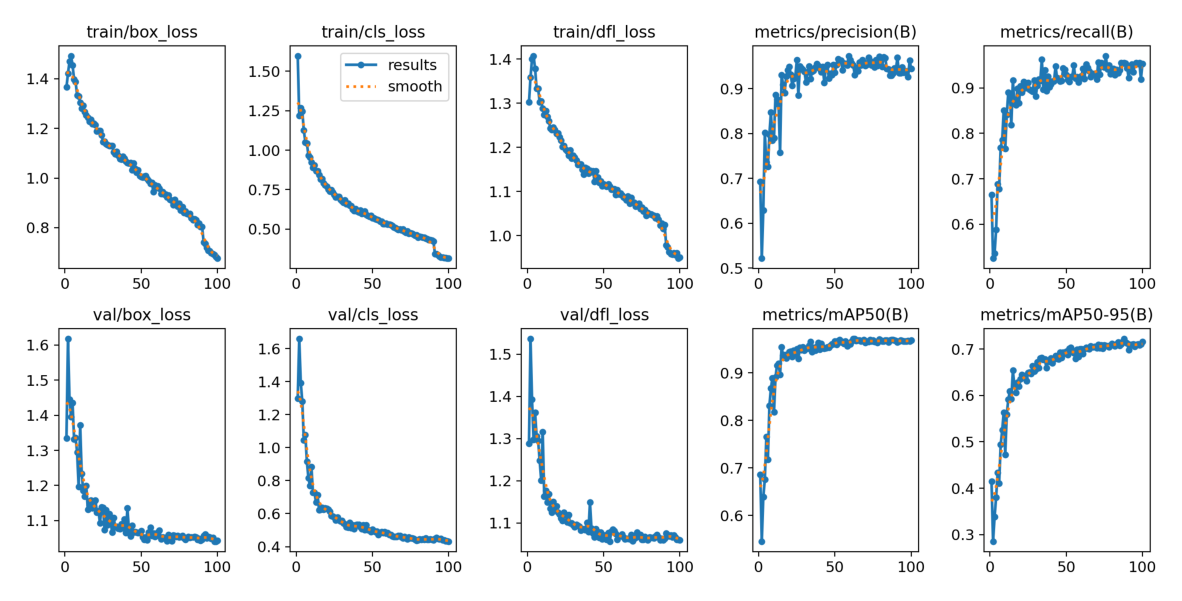

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

result_path = '/kaggle/working/runs/detect/train/results.png'

img = mpimg.imread(result_path)
plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

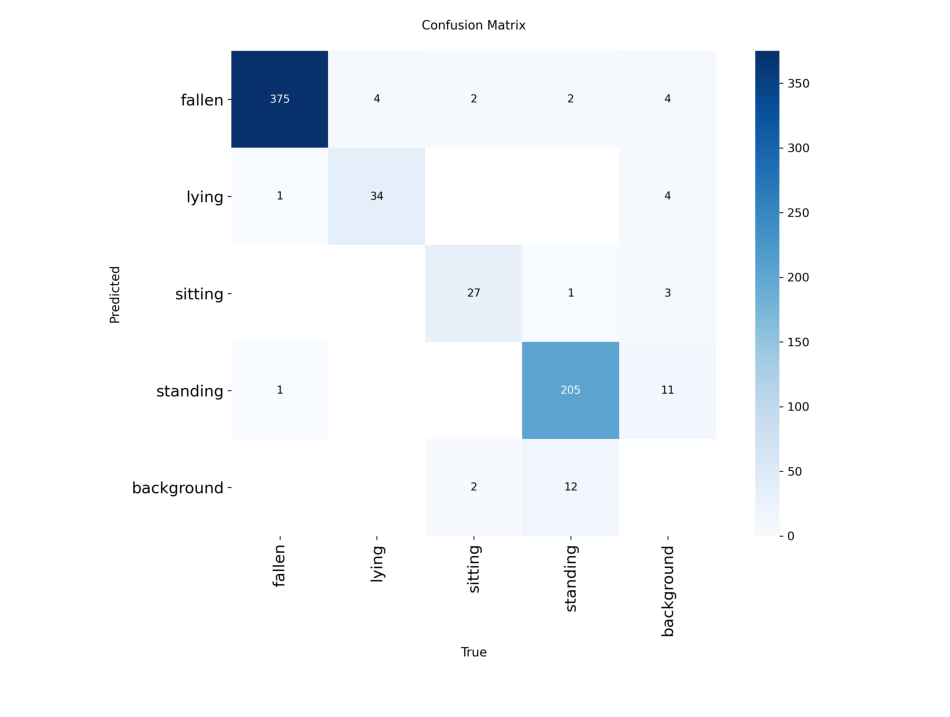

In [7]:
conf_matrix_path = '/kaggle/working/runs/detect/train/confusion_matrix.png'
img = mpimg.imread(conf_matrix_path)
plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

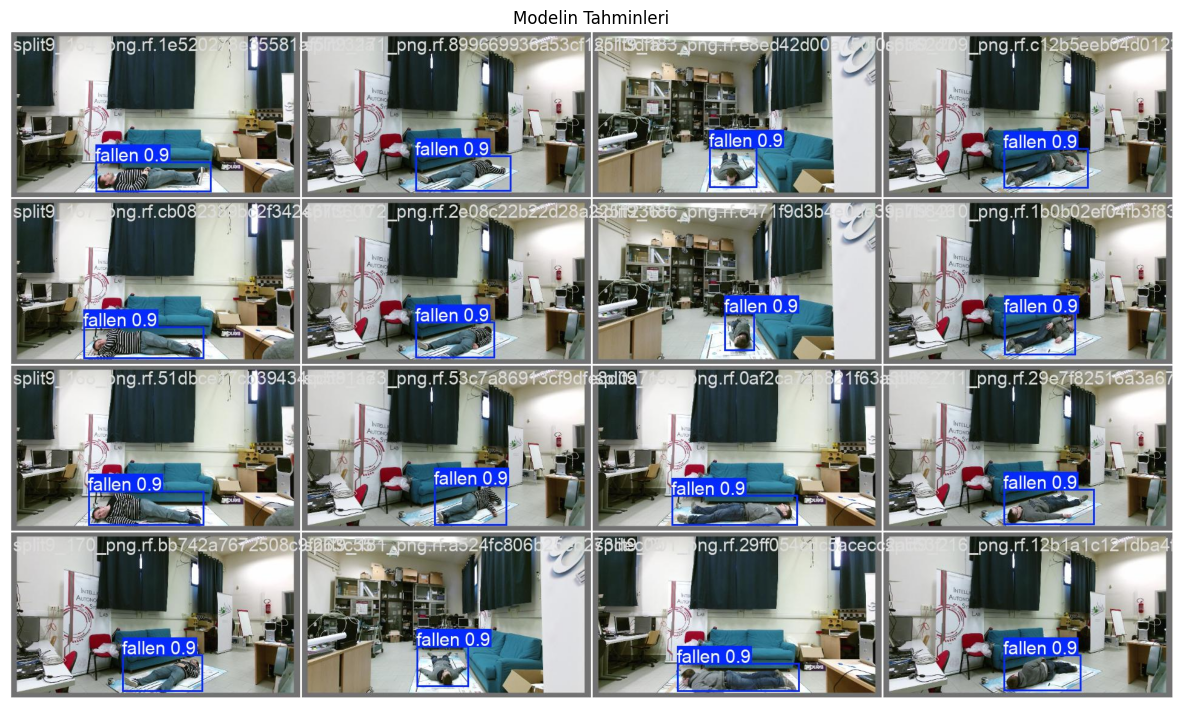

In [9]:
val_batch_path = '/kaggle/working/runs/detect/train/val_batch0_labels.jpg' 
val_pred_path = '/kaggle/working/runs/detect/train/val_batch0_pred.jpg'  

img = mpimg.imread(val_pred_path)
plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.title("Modelin Tahminleri")
plt.axis('off')
plt.show()